<h1>Scraping and Analyzing Basketball Statistics with Python  </h1>
<h2>Description</h2>


Web scraping involves extracting data from websites. In this assignment, you will web scrape basketball statistics from Wikipedia of some of the greatest basketball players. You will perform some analysis on the data using Pandas, plot, data answer some basic questions then store the data on IBM cloud.

The players we will use are shown in the following figure from left to right we have <a href='https://en.wikipedia.org/wiki/Michael_Jordan'>Michael Jordan </a>,
<a href='https://en.wikipedia.org/wiki/Kobe_Bryant'>Kobe Bryant</a>,
<a href='https://en.wikipedia.org/wiki/LeBron_James'>Lebron James</a> and <a href='https://en.wikipedia.org/wiki/Stephen_Curry'>Stephen Curry</a>.

<h2 id="Section_1"> Define a Web Scraping Function  </h2>

In this section, we define the function <code>get_basketball_stats</code>. The function will return a dictionary corresponding to the Regular season statistics of each basketball player scraped from m <a href="http://en.wikipedia.org">en.wikipedia.org</a>. 
The <a href="https://en.wikipedia.org/wiki/Parameter_(computer_programming)"> Formal Parameter </a> or input  <code> link</code> is going to be the URL of the Wikipedia page for each player. This function will return a  Python dictionary. The keys will be the column names, and the values will be a list that contains a different columns; the element of each list will be a separate row for that column.
 

In [1]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    # read the webpage
    response = requests.get(link)
    # create a BeautifulSoup object to parse the HTML
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    # the player stats are defined  with the attribute CSS class set to 'wikitable sortable';
    #therefore we create a tag object "table"
    table = soup.find(class_='wikitable sortable')

    #the headers of the table are the first table row (tr) we create a tag object that has the first row
    headers = table.tr
    titles = headers.find_all('abbr')
    #we create a dictionary  and pass the table headers as the keys
    data = {title['title']: [] for title in titles}
    #we will store each column as a list in a dictionary, the header of the column will be the dictionary key

    #we iterate over each table row by fining each table tag tr and assign it to the objed
    for row in table.find_all('tr')[1:]:
        #we iterate over each cell in the table, as each cell corresponds to a different column we all obtain the correspondin key corresponding the column n
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        # we remove extra rows by finding the smallest list
        Min = min([len(x) for x in data.values()])
        #we convert the elements in the key to floats
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data

<h2 id="Section_2">  Web Scraping the data and Converting to Pandas Dataframe   </h2>

We will need the following libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


The list <code>links</code> contain the link the Wikipedia article for each player. The list <code>names</codes> contains the names of each player.

In [4]:
links=['https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      ,'https://en.wikipedia.org/wiki/LeBron_James'\
      
      ,'https://en.wikipedia.org/wiki/Stephen_Curry']
names=['Michael Jordan','Kobe Bryant','Lebron James','Stephen Curry']

In [7]:
michael_jordan_dict = get_basketball_stats(links[0])
kobe_bryant_dict = get_basketball_stats(links[1])
lebron_james_dict = get_basketball_stats(links[2])
stephen_curry_dict = get_basketball_stats(links[3])


<h5>Converting Dictionaries to Data Frames</code> </h5>



In [8]:
mj_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)
lj_table = pd.DataFrame(lebron_james_dict)
sc_table = pd.DataFrame(stephen_curry_dict)

<h5>Displaying the head of each data frame.</h5>

Looping to process the Heads of all the Data frames  <code>display</code> as follows:

<code>display(df)</code>



In [14]:
list_table =[mj_table, kb_table, lj_table, sc_table]

i = 0
for name in names:
    print(name)
    display(list_table[i].head())
    i += 1



Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


Lebron James


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,79.0,79.0,39.5,0.417,0.290,0.754,5.5,5.9,1.6,0.7,20.9
1,80.0,80.0,42.4,0.472,0.351,0.750,7.4,7.2,2.2,0.7,27.2
2,79.0,79.0,42.5,0.480,0.335,0.738,7.0,6.6,1.6,0.8,31.4
3,78.0,78.0,40.9,0.476,0.319,0.698,6.7,6.0,1.6,0.7,27.3
4,75.0,74.0,40.4,0.484,0.315,0.712,7.9,7.2,1.8,1.1,30.0


Stephen Curry


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,77.0,36.2,0.462,0.437,0.885,4.5,5.9,1.9,0.2,17.5
1,74.0,74.0,33.6,0.480,0.442,0.934,3.9,5.8,1.5,0.3,18.6
2,26.0,23.0,28.2,0.490,0.455,0.809,3.4,5.3,1.5,0.3,14.7
3,78.0,78.0,38.2,0.451,0.453,0.900,4.0,6.9,1.6,0.2,22.9
4,78.0,78.0,36.5,0.471,0.424,0.885,4.3,8.5,1.6,0.2,24.0


<h2 id="Section_3"> Ploting the Points per game for a player using the function plt.plot().</h2>

Importing the plotting  library 

In [10]:
import matplotlib.pyplot as plt

Using the function <code>plt.plot()</code> plot the Points per game, for one player 

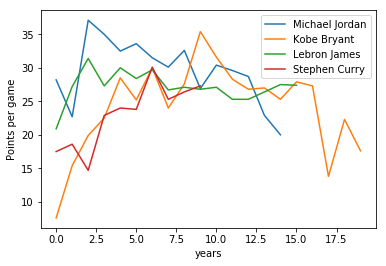

In [12]:
j = 0
for name in names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

<h2 id="Section_3">Storing the Player Statistics in Object Storage . </h2>

In [16]:
csv_name = 'MJ1.csv'
mj_table.to_csv(csv_name)
mj_table

,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5
5,82.0,82.0,39.0,0.526,0.376,0.848,6.9,6.3,2.8,0.7,33.6
6,82.0,82.0,37.0,0.539,0.312,0.851,6.0,5.5,2.7,1.0,31.5
7,80.0,80.0,38.8,0.519,0.270,0.832,6.4,6.1,2.3,0.9,30.1
8,78.0,78.0,39.3,0.495,0.352,0.837,6.7,5.5,2.8,0.8,32.6
9,17.0,17.0,39.3,0.411,0.500,0.801,6.9,5.3,1.8,0.8,26.9


In [ ]:
Author : Amul Cherukuri
Source : Wikipedia
